In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

from astropy.io import fits

In [2]:
hdul = fits.open('ID003.fits')

In [3]:
hdul[0].header

SIMPLE  =                    T / Dummy Created by MWRFITS v1.14                 
BITPIX  =                    8 / Dummy primary header created by MWRFITS        
NAXIS   =                    0 / No data is associated with this header         
EXTEND  =                    T / Extensions may (will!) be present              

In [4]:
df = pd.read_csv('ID003.csv')

In [5]:
df['UTC_DATE'] = pd.to_datetime(df['UTC_DATE'], errors='coerce')
df['LOCTIME']= pd.to_datetime(df['LOCTIME'], errors='coerce')

In [6]:
df['LOC_DATE'] = df['UTC_DATE'] + pd.Timedelta(hours=4)

In [7]:
df.columns

Index(['UTC_DATE', 'UTC_JD', 'UTC_WDAY', 'UTCNIGHT', 'UTCTIME', 'LOC_JD',
       'LOC_WDAY', 'LOCNIGHT', 'LOCTIME', 'EFFIC', 'GOODNESS', 'T_AMB',
       'T_SKY', 'FREQ', 'NSB', 'ZP', 'AZ_SUN', 'ALT_SUN', 'AZ_MOON',
       'ALT_MOON', 'AGE_MOON', 'ILLUMOON', 'DISTMOON', 'L_ZEN', 'B_ZEN',
       'ALPHAZEN', 'BETAZEN', 'GAMBONS', 'LOC_DATE'],
      dtype='object')

In [8]:
df = df.set_index('LOC_DATE') #Mettre l'index a l'heure de la Reunion

In [9]:
night = df[df['ALT_SUN']<= -18]

In [10]:
dates_de_nuit = night.index.date

# Compter le nombre de dates uniques
nombre_de_nuits = pd.Series(dates_de_nuit).nunique()

# Compter le nombre de dates uniques
nombre_de_nuits = pd.Series(dates_de_nuit).nunique()

print(f"Nombre total de nuits (jours avec au moins une observation nocturne) : {nombre_de_nuits}")

# print("\nDates des nuits identifiées :")
# print(pd.Series(dates_de_nuit).unique())

Nombre total de nuits (jours avec au moins une observation nocturne) : 780


In [11]:
night['dt'] = (night['T_AMB'] - night['T_SKY']).copy()

/tmp/ipykernel_16943/4280293771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night['dt'] = (night['T_AMB'] - night['T_SKY']).copy()


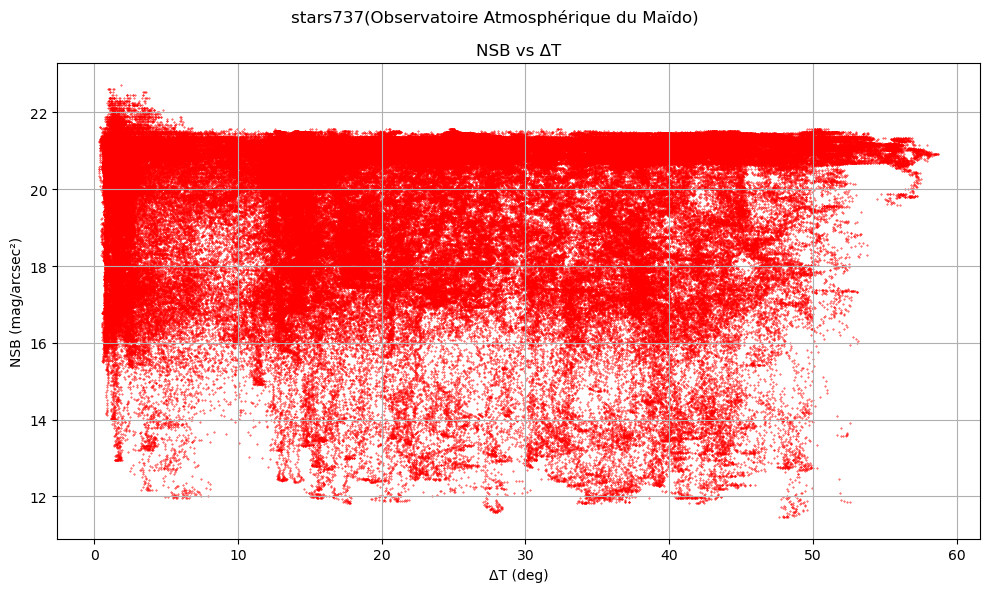

In [16]:
plt.figure(figsize=(10, 6))

plt.scatter(night['dt'], night['NSB'], marker='.', s=0.5, color ='red')

plt.suptitle('stars737(Observatoire Atmosphérique du Maïdo)')
plt.title(u'NSB vs ΔT')
plt.xlabel(u'ΔT (deg)')
plt.ylabel("NSB (mag/arcsec²)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
seuil_illumination = 0.05  # Pourcentage d'illumination max (5%)
seuil_altitude_lune = 0  # Altitude max de la lune (0 pour sous l'horizon)
seuil_b_zen = 20
seuil_dt = 20

night_clear = night[
    (night['ILLUMOON'] < seuil_illumination) &
    (night['ALT_MOON'] < seuil_altitude_lune) &
#    (np.abs(night['B_ZEN']) > seuil_b_zen) &
    (night['dt'] > seuil_dt)
].copy()


In [115]:
dates_de_nuit = night_clear.index.date

# Compter le nombre de dates uniques
nombre_de_nuits = pd.Series(dates_de_nuit).nunique()

# Compter le nombre de dates uniques
nombre_de_nuits = pd.Series(dates_de_nuit).nunique()

print(f"Nombre total de nuits claire (jours avec au moins une observation nocturne) : {nombre_de_nuits}")

print("\nDates des nuits identifiées :")
print(pd.Series(dates_de_nuit).unique())

Nombre total de nuits claire (jours avec au moins une observation nocturne) : 93

Dates des nuits identifiées :
[datetime.date(2022, 5, 30) datetime.date(2022, 5, 31)
 datetime.date(2022, 6, 1) datetime.date(2022, 6, 26)
 datetime.date(2022, 6, 27) datetime.date(2022, 6, 28)
 datetime.date(2022, 6, 29) datetime.date(2022, 6, 30)
 datetime.date(2022, 7, 1) datetime.date(2022, 7, 26)
 datetime.date(2022, 7, 27) datetime.date(2022, 7, 28)
 datetime.date(2022, 7, 29) datetime.date(2022, 7, 30)
 datetime.date(2022, 7, 31) datetime.date(2022, 8, 25)
 datetime.date(2022, 8, 26) datetime.date(2022, 8, 27)
 datetime.date(2022, 8, 28) datetime.date(2022, 8, 29)
 datetime.date(2022, 9, 24) datetime.date(2022, 9, 25)
 datetime.date(2022, 9, 26) datetime.date(2022, 9, 27)
 datetime.date(2022, 9, 28) datetime.date(2023, 2, 18)
 datetime.date(2023, 2, 19) datetime.date(2023, 2, 20)
 datetime.date(2023, 2, 22) datetime.date(2023, 3, 20)
 datetime.date(2023, 3, 21) datetime.date(2023, 4, 18)
 datetime.

In [116]:
dt = night_clear['T_AMB'] - night_clear['T_SKY']

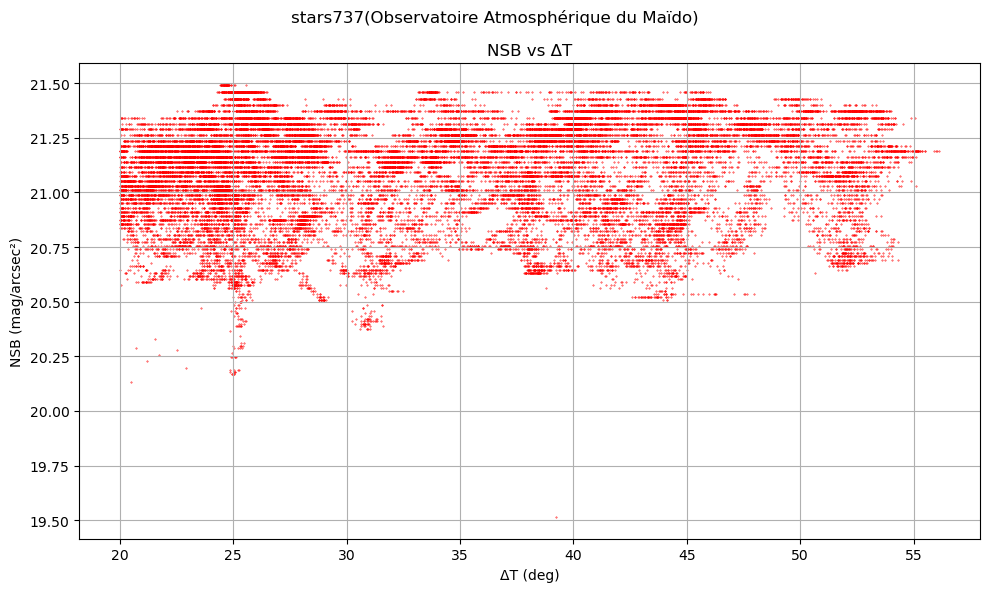

In [117]:
plt.figure(figsize=(10, 6))

plt.scatter(dt, night_clear['NSB'], marker='.', s=0.5, color ='red')

plt.suptitle('stars737(Observatoire Atmosphérique du Maïdo)')
plt.title(u'NSB vs ΔT')
plt.xlabel(u'ΔT (deg)')
plt.ylabel("NSB (mag/arcsec²)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
#date = '2022-06'
start = '2024-07-31 17:00'
end ='2024-08-07 06:00'
#period = night_clear.loc[date] #selection de la periode a visualiser
period = night_clear.loc[start:end].copy()

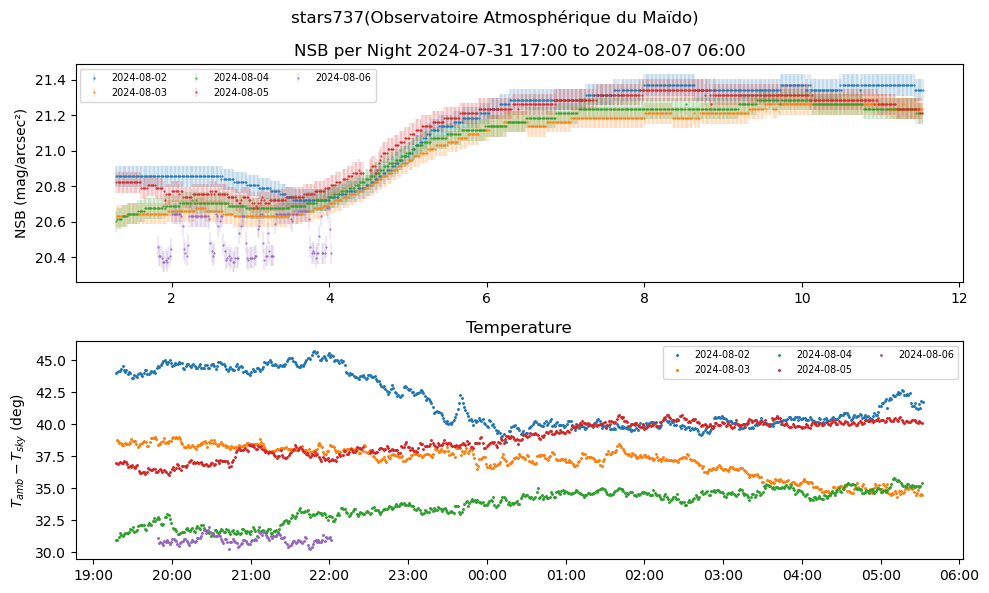

In [125]:
period['night'] = (period.index - pd.Timedelta(hours=6)).date #Creation d'une colonne night de 18h - 6h
period['night_time'] = ((period.index - pd.to_datetime(period['night'])) / pd.Timedelta(hours=1)) - 18 #Creation de la colonne nuit
#Visualisation de l'evolution du NSB par nuit dans un seul graph

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for d, g in period.groupby('night'):
    axes[0].errorbar(g['night_time'], g['NSB'], yerr = 0.06, markersize=1 ,elinewidth=0.2, fmt='.', label=d)
    axes[1].scatter(g['night_time'], g['T_AMB']-g['T_SKY'], marker='.', s=5, label=d)
    
plt.suptitle('stars737(Observatoire Atmosphérique du Maïdo)')

axes[0].set_title(f"NSB per Night {start} to {end}")
#axes[0].set_xlabel("Hours 18:00 to 6")
axes[0].set_ylabel("NSB (mag/arcsec²)")
axes[0].legend(fontsize='x-small', ncol=3)

axes[1].set_title("Temperature")
axes[1].set_ylabel("$T_{amb} - T_{sky}$ (deg)")
axes[1].legend(fontsize='x-small', ncol=3)

# Format x-axis to show HH:MM
def format_hour(x, _):
    hour = int(x + 18) % 24  # shift back to real time
    minute = int((x % 1) * 60)
    return f"{hour:02d}:{minute:02d}"

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # tick every 2 hours
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_hour))

plt.tight_layout()
plt.show()

In [120]:
night_clear['mois'] = night_clear.index.month
night_clear['annee'] = night_clear.index.year
night_clear['annee_mois'] = night_clear.index.to_period('M').astype(str)

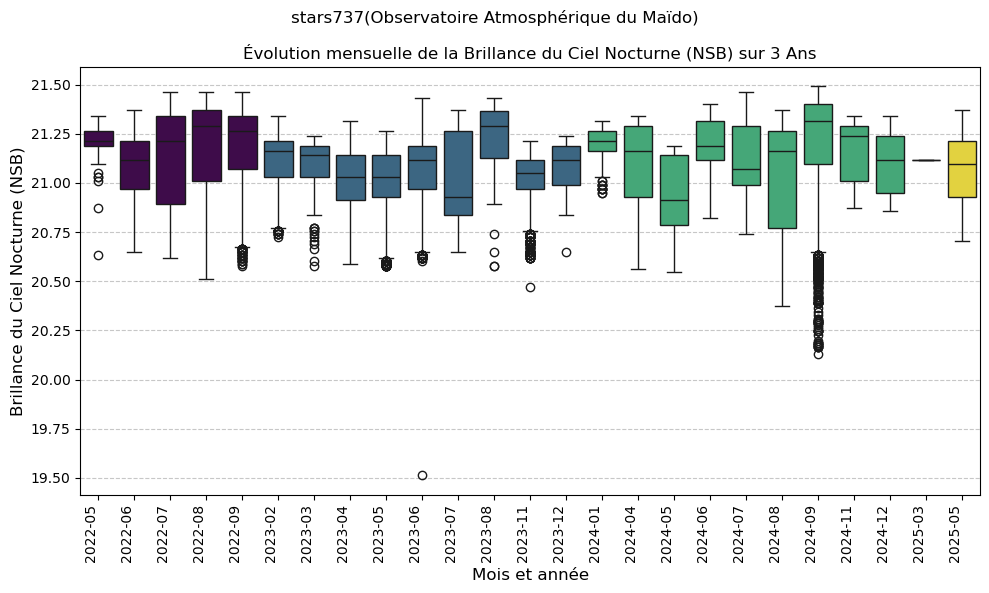

In [149]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='annee_mois', y='NSB', data=night_clear, hue='annee', palette='viridis', legend=False)

plt.suptitle('stars737(Observatoire Atmosphérique du Maïdo)')

plt.title('Évolution mensuelle de la Brillance du Ciel Nocturne (NSB) sur 3 Ans')
plt.xlabel('Mois et année', fontsize=12)
plt.ylabel('NSB (mag/arcsec²)', fontsize=12)

plt.xticks(rotation=90, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()